<a href="https://colab.research.google.com/github/mohammaddjalili/Mechatronic-Project/blob/main/Hands/Hnad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

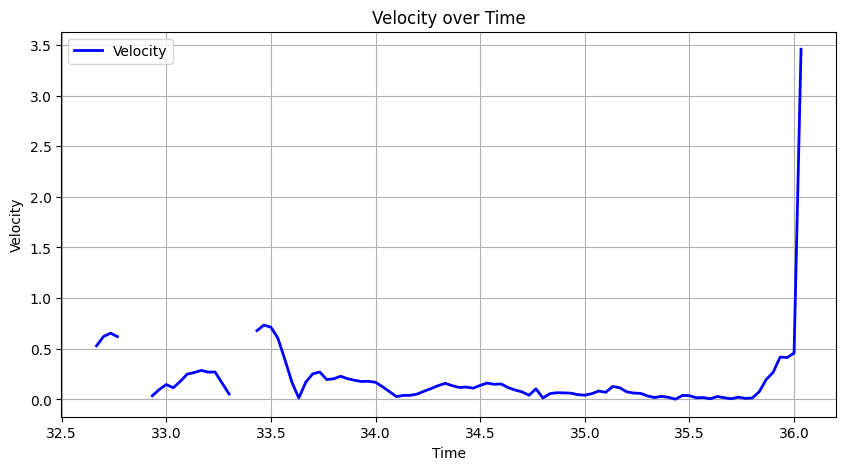

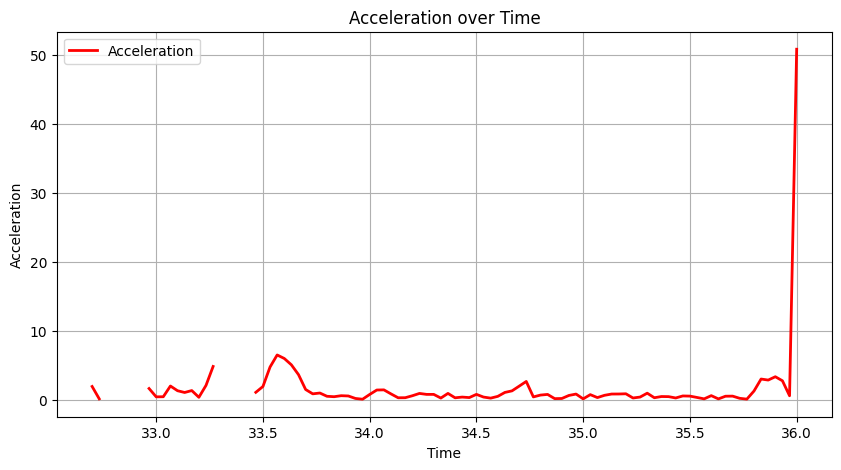

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class HandData:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = self.load_data()

    def load_data(self):
        # Load the Excel file into a DataFrame
       df = pd.read_excel(self.file_path)
        # Fill NaN values with 0
       # df.fillna(0, inplace=True)
       return df

    def calculate_velocity_acceleration(self):
        # Extract time and position data
        time = self.df['Time'].values
        x = self.df['WRIST_x'].values
        y = self.df['WRIST_y'].values
        z = self.df['WRIST_z'].values

        # Calculate the velocities in the x, y, and z directions
        vx = np.gradient(x, time)
        vy = np.gradient(y, time)
        vz = np.gradient(z, time)

        # Calculate the magnitude of velocity
        velocity = np.sqrt(vx**2 + vy**2 + vz**2 )

        # Calculate the accelerations in the x, y, and z directions
        ax = np.gradient(vx, time)
        ay = np.gradient(vy, time)
        az = np.gradient(vz, time)

        # Calculate the magnitude of acceleration
        acceleration = np.sqrt(ax**2 + ay**2 + az**2 )

        return time, velocity, acceleration

    def plot_velocity(self):
        time, velocity, _ = self.calculate_velocity_acceleration()

        plt.figure(figsize=(10, 5))
        plt.plot(time, velocity, label='Velocity', color='blue', linewidth=2)
        plt.xlabel('Time')
        plt.ylabel('Velocity')
        plt.title('Velocity over Time')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_acceleration(self):
        time, _, acceleration = self.calculate_velocity_acceleration()

        plt.figure(figsize=(10, 5))
        plt.plot(time, acceleration, label='Acceleration', color='red', linewidth=2)
        plt.xlabel('Time')
        plt.ylabel('Acceleration')
        plt.title('Acceleration over Time')
        plt.legend()
        plt.grid(True)
        plt.show()

# Create an instance of the HandData class and plot velocity and acceleration
hand_data = HandData('/content/drive/MyDrive/mechateronic/hand/S01_H/Task1_Left_concatenated_matrix.xlsx')
hand_data.plot_velocity()
hand_data.plot_acceleration()
